In [14]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

In [15]:
data = pd.read_excel("C:\\Users\\Lulu\\Desktop\\Fazel Source Code\\PYTHON PROJECT\\Local Perfume.xlsx")

print(data)

                    brand                                     instagram_link  \
0                    ORDZ            https://www.instagram.com/ordzofficial/   
1             Justin Paul        https://www.instagram.com/justinpaulparfum/   
2            Black Friday       https://www.instagram.com/theblackfriday.id/   
3             avantglossy             https://www.instagram.com/avantglossy/   
4                 Mykonos         https://www.instagram.com/officialmykonos/   
..                    ...                                                ...   
134  Likesunday Perfumery     https://www.instagram.com/likesunday.official/   
135       Santigi Perfume              https://www.instagram.com/santigi.id/   
136               Iniskin          https://www.instagram.com/iniskinofficial   
137                  Arra            https://www.instagram.com/arraprojects/   
138               Leuseni  https://www.instagram.com/leuseniofficial?igsh...   

     followers  year                var

Rata-rata jumlah followers: 24048.561151079135
Median jumlah followers: 3462.0
Modus jumlah followers: 15700

Batas bawah untuk outlier: -20915.0
Batas atas untuk outlier: 37669.0

Outliers:
                   brand  followers
4                Mykonos     286000
10                Joylab      65700
25         SONAR Perfume      52300
32               Manzone      94400
43              Readyset      51000
55            De.Claires     541000
56             Labcitane      68000
59                  Onix     124000
82            SAFF & Co.      54400
86                  Kahf     121000
98         Carl & Claire      67500
103              Kitschy      64000
108                 HMNS     306000
114      Mine. Perfumery      63400
118  Mother of Perfumery     316000
125        Buttonscarves      39700
131         Rumah Atsiri      82500
135      Santigi Perfume     167000


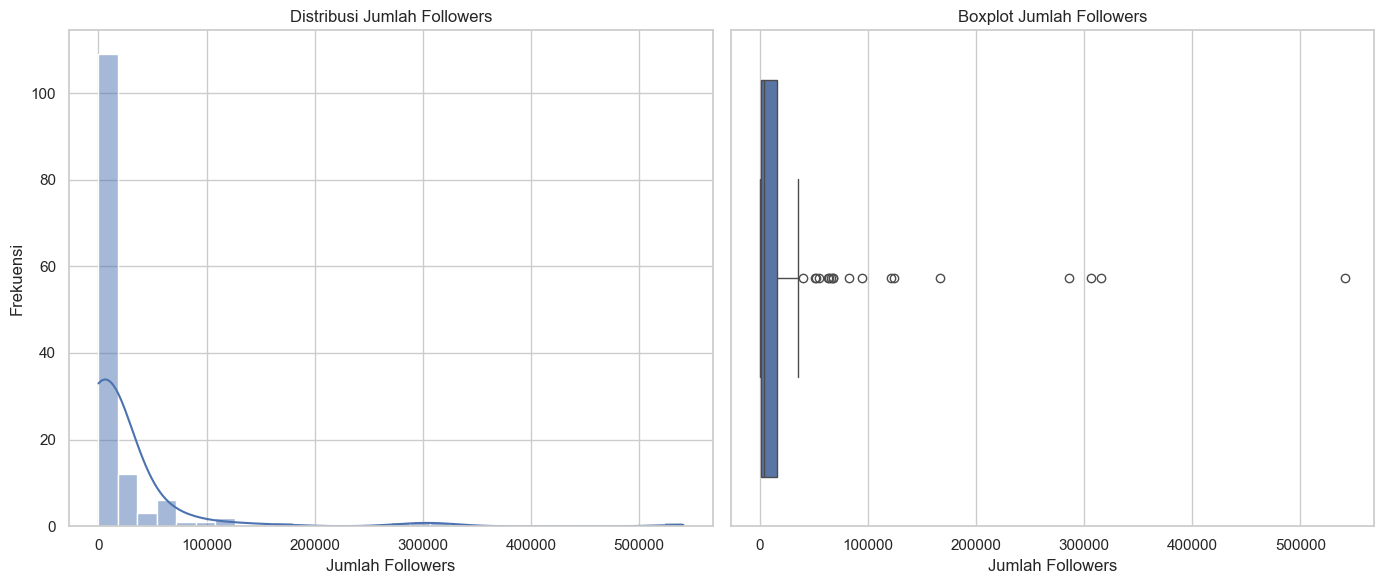

In [55]:
# Menghitung rata-rata, median, dan modus dari jumlah followers
mean_followers = data['followers'].mean()
median_followers = data['followers'].median()
mode_followers = data['followers'].mode()[0]

print(f"Rata-rata jumlah followers: {mean_followers}")
print(f"Median jumlah followers: {median_followers}")
print(f"Modus jumlah followers: {mode_followers}")

# Mengidentifikasi outlier menggunakan metode IQR
Q1 = data['followers'].quantile(0.25)  # Kuartil pertama
Q3 = data['followers'].quantile(0.75)  # Kuartil ketiga
IQR = Q3 - Q1  # Rentang interkuartil

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = data[(data['followers'] < lower_bound) | (data['followers'] > upper_bound)]

print(f"\nBatas bawah untuk outlier: {lower_bound}")
print(f"Batas atas untuk outlier: {upper_bound}")
print("\nOutliers:")
print(outliers[['brand', 'followers']])

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat figure dan axes untuk visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram jumlah followers
sns.histplot(data['followers'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribusi Jumlah Followers')
axes[0].set_xlabel('Jumlah Followers')
axes[0].set_ylabel('Frekuensi')

# Boxplot jumlah followers
sns.boxplot(x=data['followers'], ax=axes[1])
axes[1].set_title('Boxplot Jumlah Followers')
axes[1].set_xlabel('Jumlah Followers')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()

In [56]:
# Mengurutkan DataFrame berdasarkan kolom 'followers' dari yang terbanyak
data_sorted = data.sort_values(by='followers', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print("DataFrame setelah diurutkan berdasarkan followers terbanyak:")
print(data_sorted)

DataFrame setelah diurutkan berdasarkan followers terbanyak:
                   brand                               instagram_link  \
55            De.Claires  https://www.instagram.com/de.claires/?hl=en   
118  Mother of Perfumery        https://www.instagram.com/mop.beauty/   
108                 HMNS           https://www.instagram.com/hmns.id/   
4                Mykonos   https://www.instagram.com/officialmykonos/   
135      Santigi Perfume        https://www.instagram.com/santigi.id/   
..                   ...                                          ...   
113     Multitude Scents  https://www.instagram.com/multitude.scents/   
9         Pive Perfumery           https://www.instagram.com/pive.co/   
19             Ara Scent         https://www.instagram.com/ara.scent/   
0                   ORDZ      https://www.instagram.com/ordzofficial/   
24             La'vourse         https://www.instagram.com/la.vourse/   

     followers  year           variant  \
55      541000  2018

In [21]:
data['price'] = data['price'].replace(',', '', regex=True).astype(float).astype(int)

Rata-rata harga produk: 235500.85611510792

Distribusi harga produk:
count       139.000000
mean     235500.856115
std      166376.758635
min       53800.000000
25%      149000.000000
50%      189000.000000
75%      249500.000000
max      995000.000000
Name: price, dtype: float64


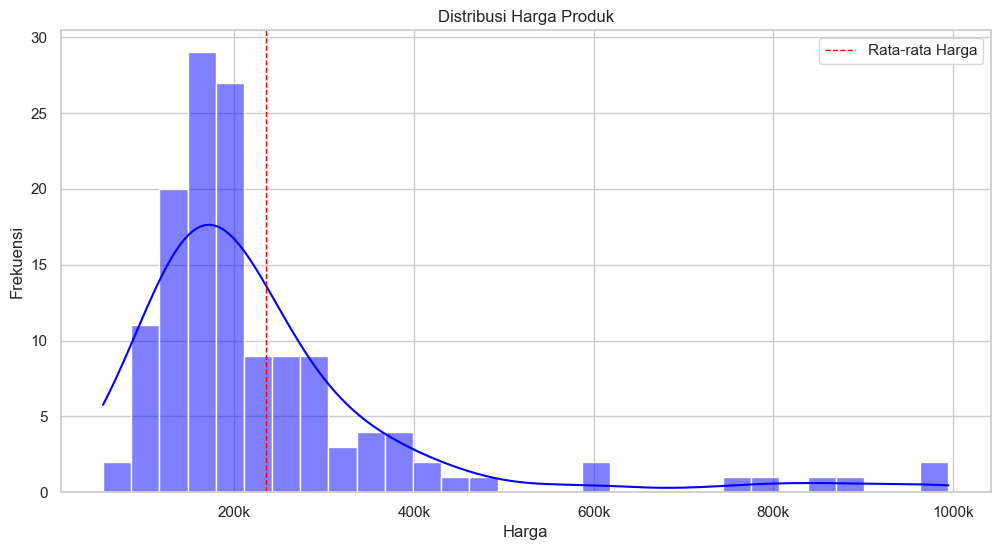

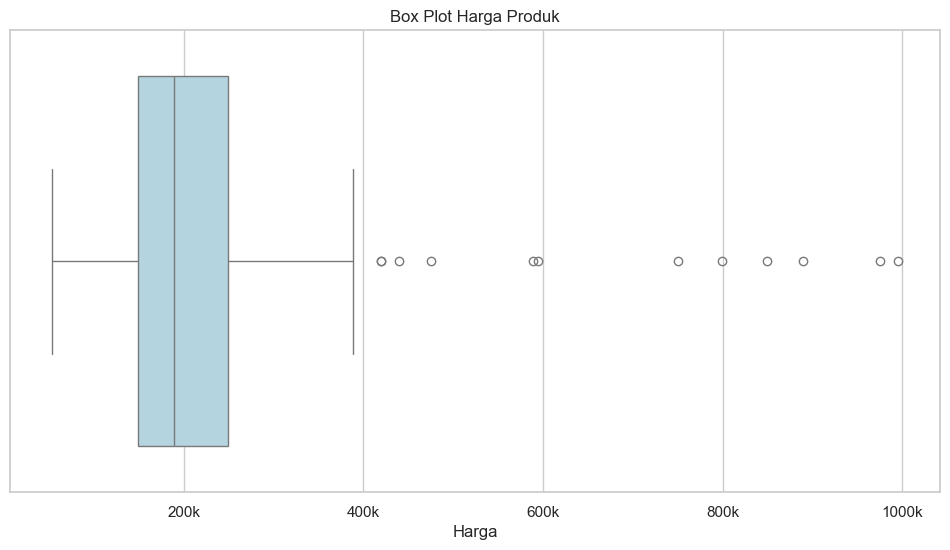

In [26]:
# Menghitung rata-rata harga
average_price = data['price'].mean()

# Menghitung distribusi harga
price_distribution = data['price'].describe()

# Menampilkan hasil
print("Rata-rata harga produk:", average_price)
print("\nDistribusi harga produk:")
print(price_distribution)

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=30, kde=True, color='blue')
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.axvline(data['price'].mean(), color='red', linestyle='dashed', linewidth=1, label='Rata-rata Harga')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
plt.legend()
plt.show()

# Membuat box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['price'], color='lightblue')
plt.title('Box Plot Harga Produk')
plt.xlabel('Harga')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
plt.show()


In [27]:
# Menemukan produk dengan harga tertinggi
highest_price_product = data.loc[data['price'].idxmax()]

# Menemukan produk dengan harga terendah
lowest_price_product = data.loc[data['price'].idxmin()]

# Menampilkan hasil
print("\nProduk dengan harga tertinggi:")
print(highest_price_product[['brand', 'price']])

print("\nProduk dengan harga terendah:")
print(lowest_price_product[['brand', 'price']])


Produk dengan harga tertinggi:
brand    Leuseni
price     995000
Name: 138, dtype: object

Produk dengan harga terendah:
brand    Maison William Sicher
price                    53800
Name: 122, dtype: object


DataFrame setelah diurutkan berdasarkan price termahal:
                    brand       price
138               Leuseni  995,000.00
137                  Arra   99,000.00
136               Iniskin   99,000.00
135       Santigi Perfume   99,000.00
134  Likesunday Perfumery   98,000.00
133               Hausser  975,000.00
132          Fabee Scents   96,000.00
131          Rumah Atsiri   95,000.00
130          Noir Perfume   92,900.00
129         Normal Estate  889,000.00


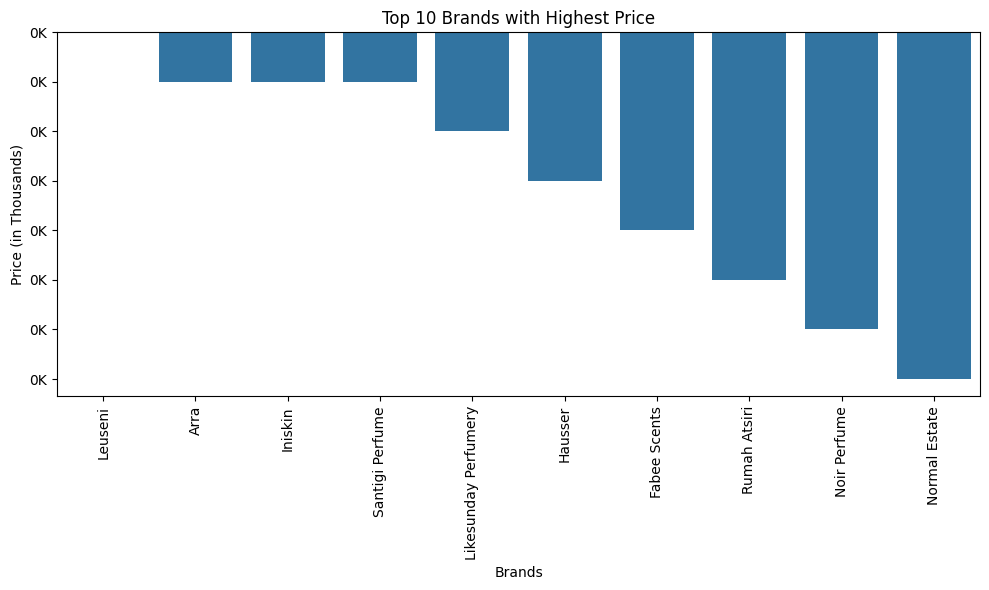

In [10]:
# Mengurutkan DataFrame berdasarkan kolom 'price' dari yang termahal
data_sorted = data.sort_values(by='price', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print("DataFrame setelah diurutkan berdasarkan price termahal:")
print(data_sorted[["brand", "price"]].head(10))

# Membuat visualisasi bar chart untuk price termahal
plt.figure(figsize=(10, 6))
sns.barplot(x=data_sorted['brand'].head(10), y=data_sorted['price'].head(10))

# Memformat nilai y-axis dalam ribuan (K)
def thousands(x, pos):
    return '%1.0fK' % (x * 1e-3)

formatter = FuncFormatter(thousands)
plt.gca().yaxis.set_major_formatter(formatter)

# Memberi judul dan label
plt.title("Top 10 Brands with Highest Price")
plt.xlabel("Brands")
plt.ylabel("Price (in Thousands)")
plt.xticks(rotation=90)

# Menyesuaikan layout
plt.tight_layout()
plt.show()

In [8]:
data['price_per_ml'] = data['price_per_ml'].replace(',', '', regex=True).astype(float).astype(int)

DataFrame setelah diurutkan berdasarkan price per ml termahal:
                   brand  price_per_ml
66               Leuseni         19900
50               Hausser         19500
85         Normal Estate         17780
43           Fakhrul Oud         17000
86             Oaken Lab         15980
3          Alien Objects         15000
102         Rumah Atsiri          9500
68     Maison d' Ophelia          9500
77   Mother of Perfumery          9333
28         Carl & Claire          9133


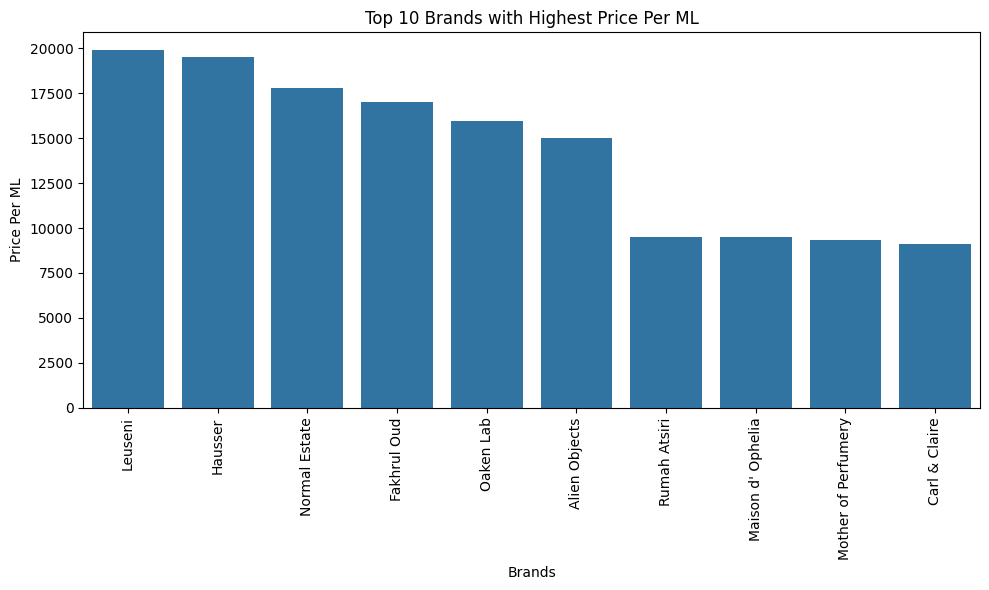

In [32]:
# Mengurutkan DataFrame berdasarkan kolom 'price per ml' dari yang termahal
data_sorted = data.sort_values(by='price_per_ml', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print("DataFrame setelah diurutkan berdasarkan price per ml termahal:")
print(data_sorted[["brand", "price_per_ml"]].head(10))

# Membuat visualisasi bar chart untuk price_per_ml termahal
plt.figure(figsize=(10, 6))
sns.barplot(x=data_sorted['brand'].head(10), y=data_sorted['price_per_ml'].head(10))
plt.title("Top 10 Brands with Highest Price Per ML")
plt.xlabel("Brands")
plt.ylabel("Price Per ML")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

DataFrame setelah diurutkan berdasarkan price termurah:
                     brand   price
122  Maison William Sicher   53800
123      Dewdrop Perfumery   55920
130           Noir Perfume   92900
131           Rumah Atsiri   95000
132           Fabee Scents   96000
134   Likesunday Perfumery   98000
136                Iniskin   99000
135        Santigi Perfume   99000
137                   Arra   99000
0                     ORDZ  100500


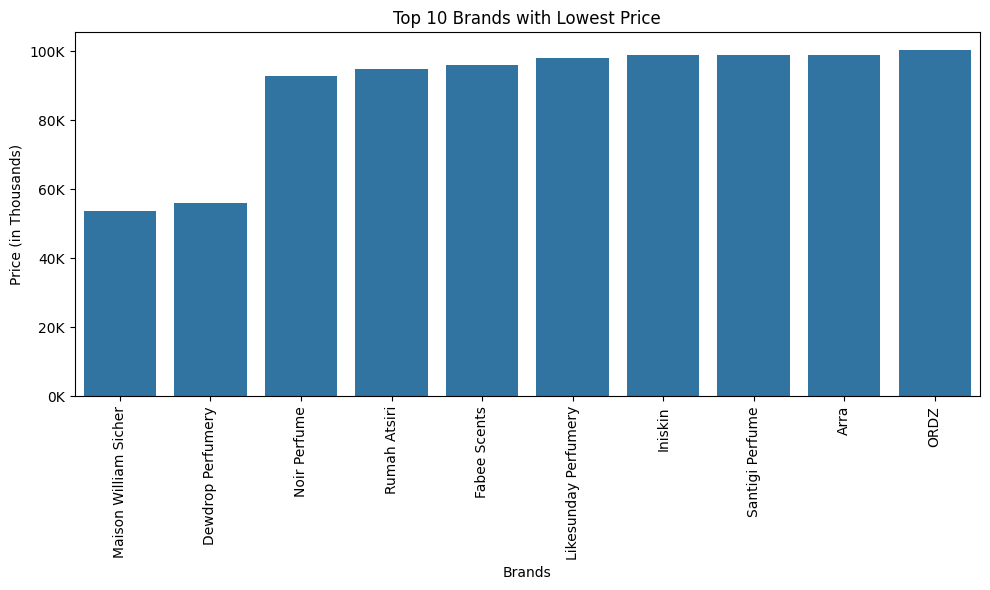

In [15]:
# Mengurutkan DataFrame berdasarkan kolom 'price' dari yang termurah
data_sorted = data.sort_values(by='price', ascending=True)

# Menampilkan DataFrame yang telah diurutkan
print("DataFrame setelah diurutkan berdasarkan price termurah:")
print(data_sorted[["brand", "price"]].head(10))

# Membuat visualisasi bar chart untuk price termahal
plt.figure(figsize=(10, 6))
sns.barplot(x=data_sorted['brand'].head(10), y=data_sorted['price'].head(10))

# Memformat nilai y-axis dalam ribuan (K)
def thousands(x, pos):
    return '%1.0fK' % (x * 1e-3)

formatter = FuncFormatter(thousands)
plt.gca().yaxis.set_major_formatter(formatter)

# Memberi judul dan label
plt.title("Top 10 Brands with Lowest Price")
plt.xlabel("Brands")
plt.ylabel("Price (in Thousands)")
plt.xticks(rotation=90)

# Menyesuaikan layout
plt.tight_layout()
plt.show()

DataFrame setelah diurutkan berdasarkan size yang terbesar:
                     brand  size
48            Gean Parfume   105
116        Scentworks & Co   105
1                    Aksen   100
16   Bali Surfer's Perfume   100
47                 Fordive   100
52                    HMNS   100
29              De Antoine   100
14                Avicenna   100
22                 Brishka   100
71                 Manzone   100


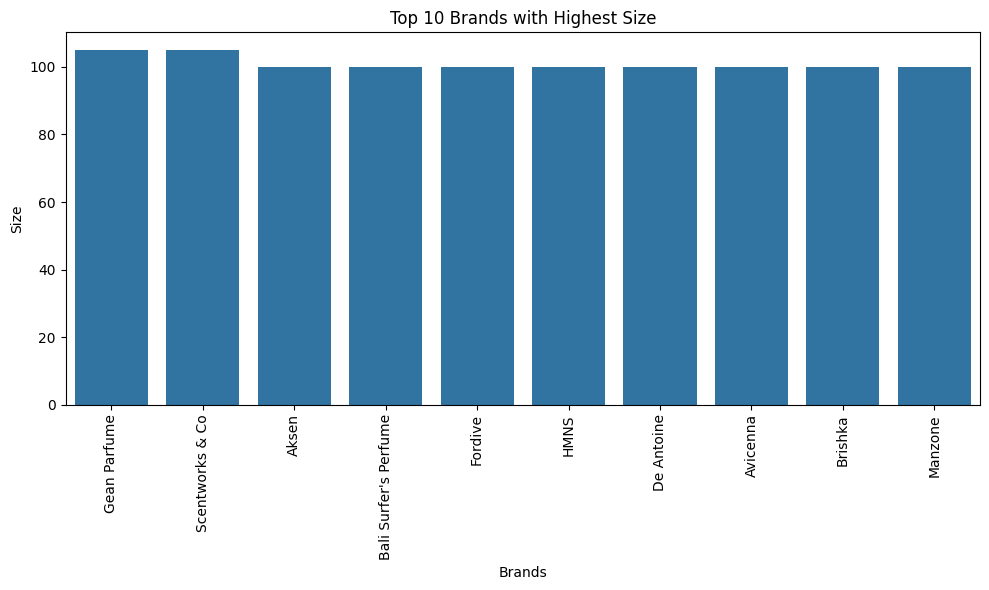

In [30]:
# Mengurutkan DataFrame berdasarkan kolom 'size' dari yang terbesar
data_sorted = data.sort_values(by='size', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print("DataFrame setelah diurutkan berdasarkan size yang terbesar:")
print(data_sorted[["brand", "size"]].head(10))

# Membuat visualisasi bar chart untuk price_per_ml termahal
plt.figure(figsize=(10, 6))
sns.barplot(x=data_sorted['brand'].head(10), y=data_sorted['size'].head(10))
plt.title("Top 10 Brands with Highest Size")
plt.xlabel("Brands")
plt.ylabel("Size")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

10 Aroma (notes) yang paling sering muncul:
Vanilla       64
Musk          61
Jasmine       41
Amber         39
Rose          37
Bergamot      36
Patchouli     34
Cedarwood     26
Sandalwood    25
Peony         16
Name: count, dtype: int64


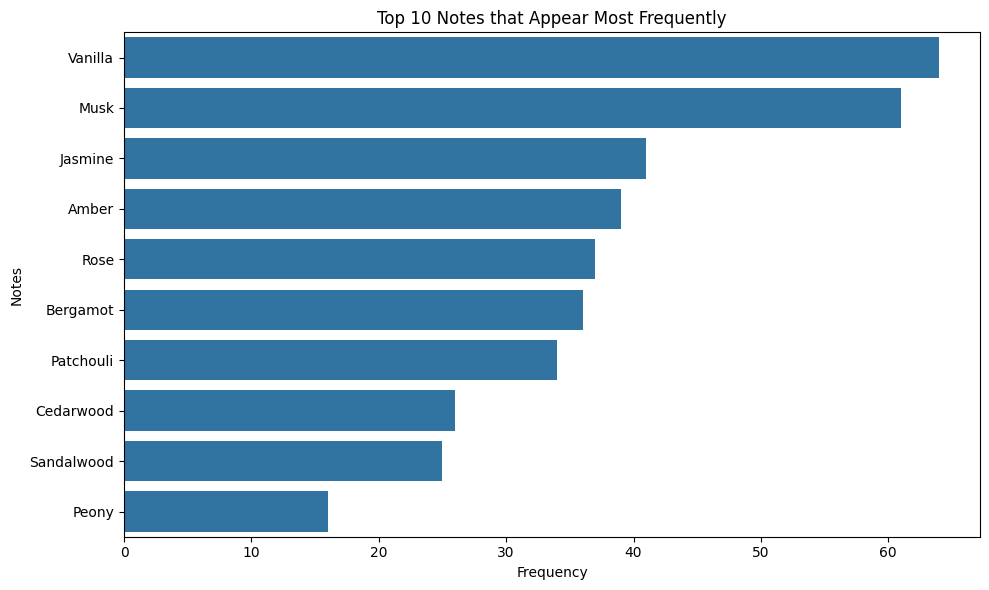

In [36]:
# Menggabungkan semua kolom notes menjadi satu kolom panjang
all_notes = pd.concat([data['top_notes1'], data['top_notes2'], data['top_notes3'], data['top_notes4'], 
                       data['top_notes5'], data['top_notes6'], data['top_notes7'], data['top_notes8'], 
                       data['top_notes9'], data['mid_notes1'], data['mid_notes2'], data['mid_notes3'], 
                       data['mid_notes4'], data['mid_notes5'], data['mid_notes6'], data['mid_notes7'], 
                       data['mid_notes8'], data['mid_notes9'], data['base_notes1'], data['base_notes2'], 
                       data['base_notes3'], data['base_notes4'], data['base_notes5'], data['base_notes6'], 
                       data['base_notes7'], data['base_notes8'], data['base_notes9'], data['base_notes10']], 
                      axis=0)

# Menghitung frekuensi kemunculan setiap note (aroma)
notes_counts = all_notes.value_counts()

# Menampilkan 10 aroma (notes) yang paling sering muncul
top_10_notes = notes_counts.head(10)

print("10 Aroma (notes) yang paling sering muncul:")
print(top_10_notes)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_notes.values, y=top_10_notes.index)
plt.title("Top 10 Notes that Appear Most Frequently")
plt.xlabel("Frequency")
plt.ylabel("Notes")
plt.tight_layout()
plt.show()

Brand dengan konsentrasi EDP:
                    brand concentration
0                    ORDZ           EDP
1             Justin Paul           EDP
2            Black Friday           EDP
3             avantglossy           EDP
4                 Mykonos           EDP
..                    ...           ...
134  Likesunday Perfumery           EDP
135       Santigi Perfume           EDP
136               Iniskin           EDP
137                  Arra           EDP
138               Leuseni           EDP

[120 rows x 2 columns]

Brand dengan konsentrasi XDP:
                     brand concentration
22                    Zior           XDP
24               La'vourse           XDP
26              Art Derora           XDP
27                   Beure           XDP
47   Blondeurr Perfume Lab           XDP
54                   Fonce           XDP
56               Labcitane           XDP
66           The Body Tale           XDP
82              SAFF & Co.           XDP
89          Layr Fragranc

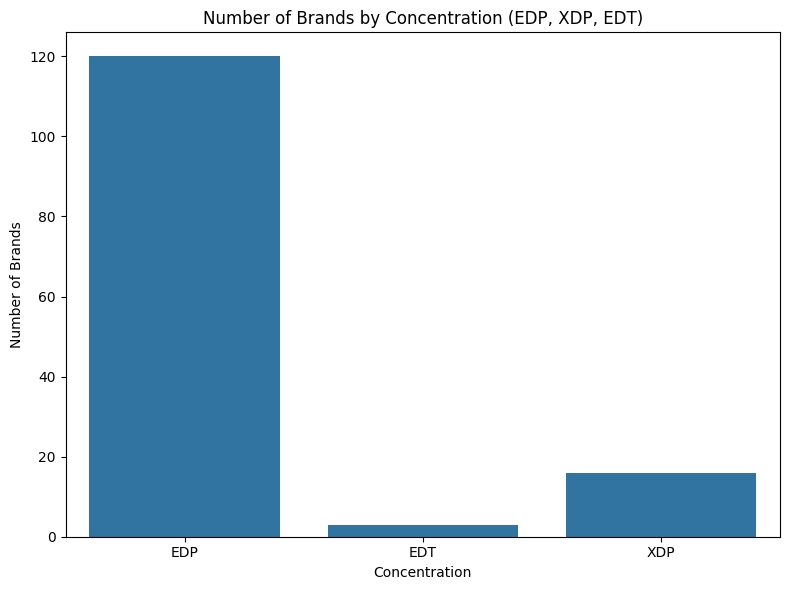

In [25]:
# Memisahkan brand dengan konsentrasi EDP
edp_brands = data[data['concentration'] == 'EDP']

# Memisahkan brand dengan konsentrasi XDP
xdp_brands = data[data['concentration'] == 'XDP']

# Memisahkan brand dengan konsentrasi EDT
edt_brands = data[data['concentration'] == 'EDT']

# Menampilkan hasil
print("Brand dengan konsentrasi EDP:")
print(edp_brands[['brand', 'concentration']])

print("\nBrand dengan konsentrasi XDP:")
print(xdp_brands[['brand', 'concentration']])

print("\nBrand dengan konsentrasi EDT:")
print(edt_brands[['brand', 'concentration']])

# Membuat visualisasi perbandingan jumlah brand berdasarkan konsentrasi
plt.figure(figsize=(8, 6))
sns.countplot(x='concentration', data=data)

# Memberi judul dan label
plt.title("Number of Brands by Concentration (EDP, XDP, EDT)")
plt.xlabel("Concentration")
plt.ylabel("Number of Brands")

# Menampilkan grafik
plt.tight_layout()
plt.show()

Koefisien Korelasi antara Followers dan Harga: -0.01


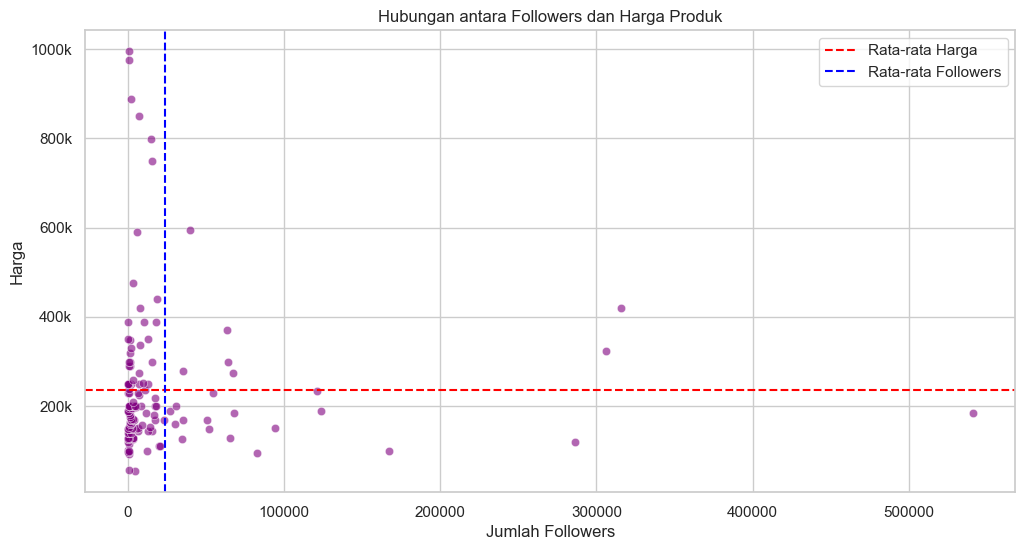

In [30]:
# Menghitung korelasi antara 'followers' dan 'price'
# Hitung koefisien korelasi
correlation = data['followers'].corr(data['price'])

print(f"Koefisien Korelasi antara Followers dan Harga: {correlation:.2f}")

# Membuat scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='followers', y='price', data=data, color='purple', alpha=0.6)
plt.title('Hubungan antara Followers dan Harga Produk')
plt.xlabel('Jumlah Followers')
plt.ylabel('Harga')
plt.axhline(y=data['price'].mean(), color='red', linestyle='--', label='Rata-rata Harga')
plt.axvline(x=data['followers'].mean(), color='blue', linestyle='--', label='Rata-rata Followers')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y/1000)}k'))
plt.legend()
plt.show()

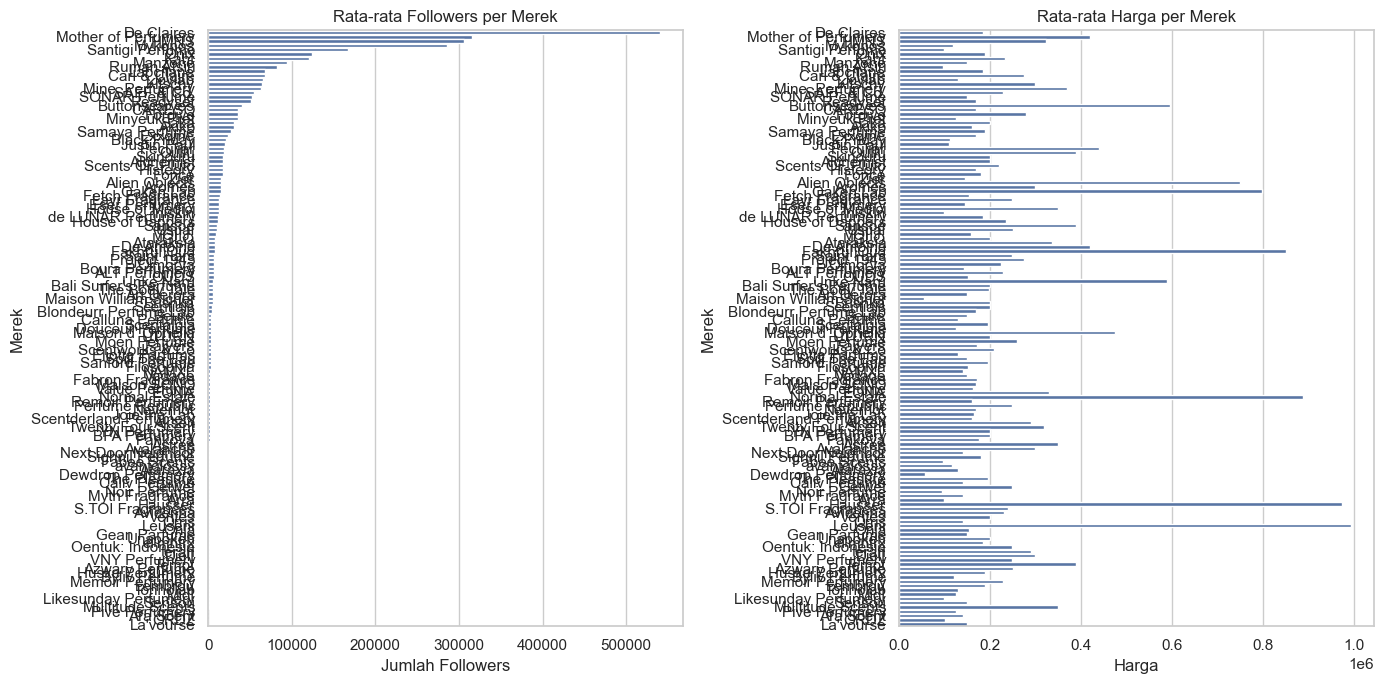

In [49]:
# Menghitung rata-rata followers dan harga untuk setiap merek
average_data = data.groupby('brand').agg({'followers': 'mean', 'price': 'mean'}).reset_index()

# Mengurutkan berdasarkan followers
average_data_sorted = average_data.sort_values(by='followers', ascending=False)

# Plotting
plt.figure(figsize=(14, 7))

# Bar plot untuk rata-rata followers
plt.subplot(1, 2, 1)
sns.barplot(data=average_data_sorted, x='followers', y='brand')
plt.title('Rata-rata Followers per Merek')
plt.xlabel('Jumlah Followers')
plt.ylabel('Merek')

# Bar plot untuk rata-rata harga
plt.subplot(1, 2, 2)
sns.barplot(data=average_data_sorted, x='price', y='brand')
plt.title('Rata-rata Harga per Merek')
plt.xlabel('Harga')
plt.ylabel('Merek')

plt.tight_layout()
plt.show()

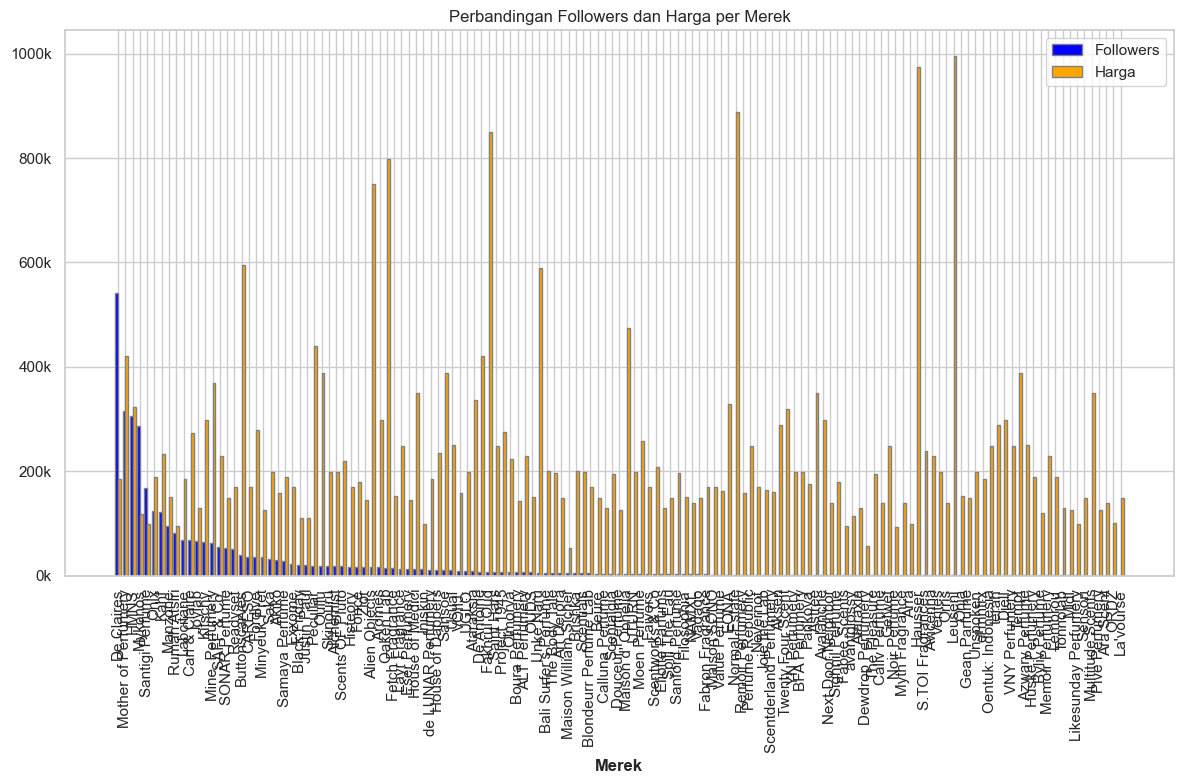

In [52]:
# Mengatur lebar bar
bar_width = 0.4

# Menentukan posisi x
r1 = range(len(average_data_sorted))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(r1, average_data_sorted['followers'], color='blue', width=bar_width, edgecolor='grey', label='Followers')
plt.bar(r2, average_data_sorted['price'], color='orange', width=bar_width, edgecolor='grey', label='Harga')

# Labeling
plt.xlabel('Merek', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(average_data_sorted))], average_data_sorted['brand'], rotation=90)
plt.title('Perbandingan Followers dan Harga per Merek')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y/1000)}k'))
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
# Hitung rata-rata followers dan harga
average_followers = data['followers'].mean()
average_price = data['price'].mean()

# Filter merek dengan followers tinggi (di atas rata-rata) dan harga rendah (di bawah rata-rata)
opportunity_brands = data[(data['followers'] > average_followers) & (data['price'] < average_price)]

# Menampilkan hasil
print("Merek dengan followers tinggi tetapi harga rendah:")
print(opportunity_brands[['brand', 'followers', 'price']])

Merek dengan followers tinggi tetapi harga rendah:
               brand  followers   price
4            Mykonos     286000  119000
6       Minyeuk Pret      35100  125000
10            Joylab      65700  129000
25     SONAR Perfume      52300  149000
32           Manzone      94400  149900
38             Akiko      30100  159000
43          Readyset      51000  169000
44            CARESO      35700  169000
55        De.Claires     541000  185000
56         Labcitane      68000  185000
59              Onix     124000  189000
60    Samaya Perfume      27200  189000
67              Saka      30900  199000
82        SAFF & Co.      54400  229000
86              Kahf     121000  232750
131     Rumah Atsiri      82500   95000
135  Santigi Perfume     167000   99000


Rata-rata harga berdasarkan ukuran:
    size          price
0     10   95000.000000
1     30  152343.478261
2     33  125000.000000
3     35  167650.000000
4     40  289000.000000
5     45  420000.000000
6     50  257960.000000
7     55  242500.000000
8     75  329000.000000
9     85  595000.000000
10   100  278333.266667
11   105  179000.000000


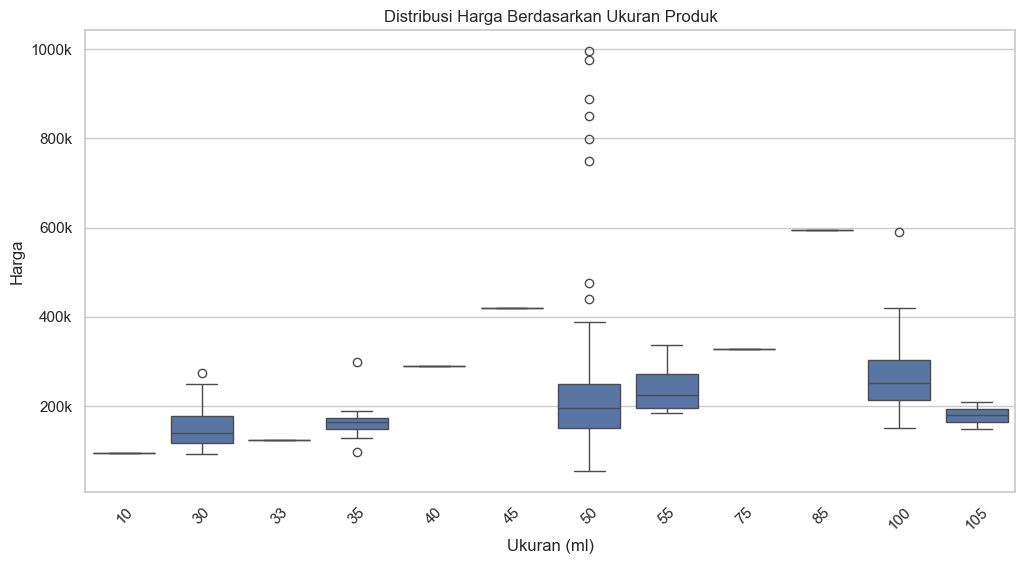

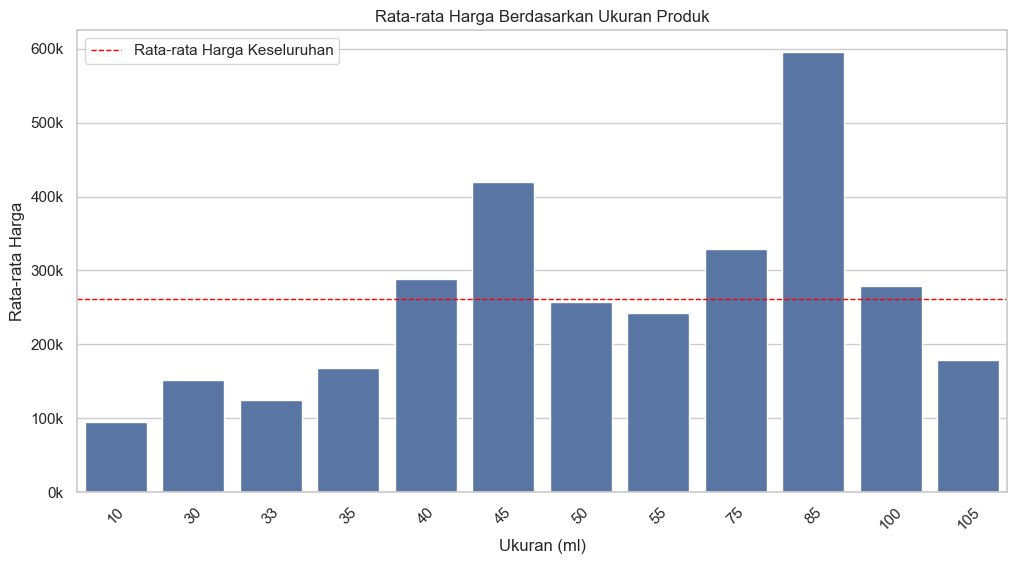

Koefisien Korelasi antara Ukuran dan Harga: 0.21


In [38]:
# Analisis Deskriptif: Rata-rata harga berdasarkan ukuran
average_price_by_size = data.groupby('size')['price'].mean().reset_index()
print("Rata-rata harga berdasarkan ukuran:")
print(average_price_by_size)

# Visualisasi: Box Plot untuk distribusi harga berdasarkan ukuran
plt.figure(figsize=(12, 6))
sns.boxplot(x='size', y='price', data=data)
plt.title('Distribusi Harga Berdasarkan Ukuran Produk')
plt.xlabel('Ukuran (ml)')
plt.ylabel('Harga')
plt.xticks(rotation=45)  # Memutar label sumbu x jika terlalu banyak ukuran
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y/1000)}k'))
plt.show()

# Visualisasi: Bar Plot untuk rata-rata harga berdasarkan ukuran
plt.figure(figsize=(12, 6))
sns.barplot(x='size', y='price', data=average_price_by_size)
plt.title('Rata-rata Harga Berdasarkan Ukuran Produk')
plt.xlabel('Ukuran (ml)')
plt.ylabel('Rata-rata Harga')
plt.xticks(rotation=45)  # Memutar label sumbu x
plt.axhline(y=average_price_by_size['price'].mean(), color='red', linestyle='dashed', linewidth=1, label='Rata-rata Harga Keseluruhan')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y/1000)}k'))
plt.legend()
plt.show()

# Jika ukuran diukur dalam angka, hitung koefisien korelasi antara ukuran dan harga
if data['size'].dtype in ['int64', 'float64']:
    correlation_size_price = data['size'].corr(data['price'])
    print(f"Koefisien Korelasi antara Ukuran dan Harga: {correlation_size_price:.2f}")

kategori_followers
Menengah    249902.564103
Rendah      230329.774194
Tinggi      223964.285714
Name: price, dtype: float64


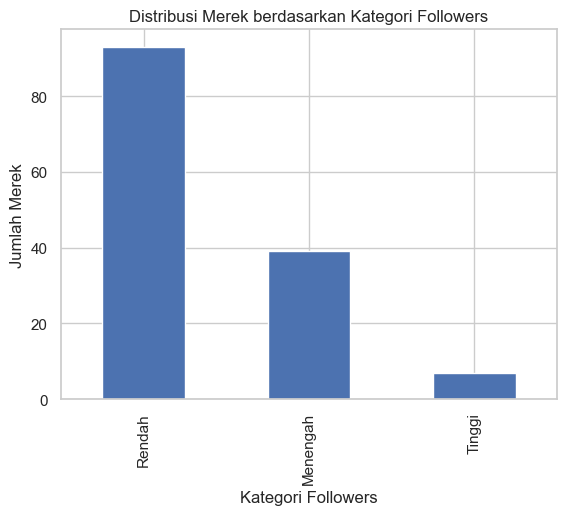

In [40]:
# Membuat kategori berdasarkan jumlah followers
def categorize_followers(followers):
    if followers <= 10000:
        return 'Rendah'
    elif 10001 <= followers <= 100000:
        return 'Menengah'
    else:
        return 'Tinggi'

# Terapkan fungsi ke kolom followers
data['kategori_followers'] = data['followers'].apply(categorize_followers)

# Menghitung rata-rata harga per kategori followers
avg_price_per_category = data.groupby('kategori_followers')['price'].mean()

print(avg_price_per_category)

# Membuat visualisasi distribusi followers per kategori
data['kategori_followers'].value_counts().plot(kind='bar')
plt.title('Distribusi Merek berdasarkan Kategori Followers')
plt.xlabel('Kategori Followers')
plt.ylabel('Jumlah Merek')
plt.show()

In [43]:
# Membuat kelompok harga
bins = [0, 100000, 200000, 300000, 400000, 500000, float('inf')]
labels = ['<100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '>500k']

# Menambahkan kolom baru 'price_range' berdasarkan kelompok harga
data['price_range'] = pd.cut(data['price'], bins=bins, labels=labels)

# Menghitung jumlah variasi produk berdasarkan rentang harga, menggunakan observed=True
price_variation = data.groupby('price_range', observed=True)['brand'].nunique()

# Menampilkan hasil
print(price_variation)

price_range
<100k         9
100k-200k    79
200k-300k    28
300k-400k    11
400k-500k     4
>500k         8
Name: brand, dtype: int64


In [45]:
# Menghitung variasi berdasarkan konsentrasi
concentration_variation = data.groupby('concentration')['brand'].nunique()

# Menghitung variasi berdasarkan ukuran produk
size_variation = data.groupby('size')['brand'].nunique()

# Menampilkan hasil
print(concentration_variation)
print(size_variation)


concentration
EDP    120
EDT      3
XDP     16
Name: brand, dtype: int64
size
10      1
30     23
33      1
35     12
40      1
45      1
50     77
55      4
75      1
85      1
100    15
105     2
Name: brand, dtype: int64


Jumlah kemunculan brand setiap tahun:
year
2023    41
2022    35
2021    21
2020    21
2019    11
2018     4
2024     4
2013     1
2015     1
Name: count, dtype: int64
Tahun yang paling banyak brand baru: 2023 dengan jumlah: 41


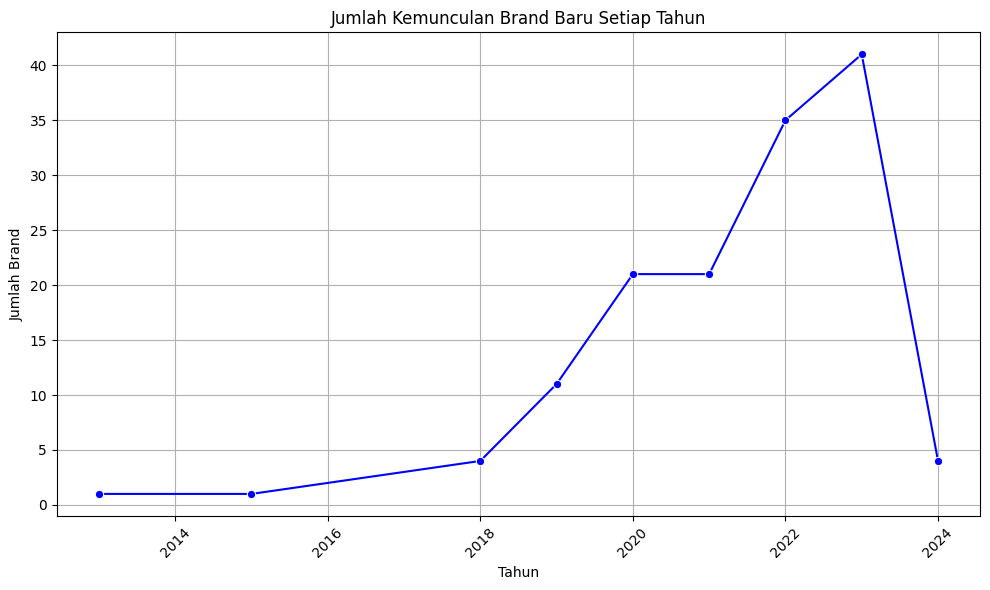

In [46]:
# Step 1: Count the occurrences of each year
year_counts = data['year'].value_counts()

# Display the top 10 occurrences of years
print("Jumlah kemunculan brand setiap tahun:")
print(year_counts.head(10))  # Display the top 10 occurrences

# Step 2: Find the year that appears the most
most_common_year = year_counts.idxmax()
most_common_count = year_counts.max()

# Step 3: Display the result
print(f"Tahun yang paling banyak brand baru: {most_common_year} dengan jumlah: {most_common_count}")

# Count the occurrences of each year
year_counts = data['year'].value_counts().sort_index()  # Sort by year

# Create a line plot for the occurrences of each year
plt.figure(figsize=(10, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='blue')
plt.title("Jumlah Kemunculan Brand Baru Setiap Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Brand")
plt.xticks(rotation=45)
plt.grid(True)  # Optional: Add grid for better readability
plt.tight_layout()
plt.show()

Korelasi antara jumlah followers dan jumlah notes: -0.13961330360295413


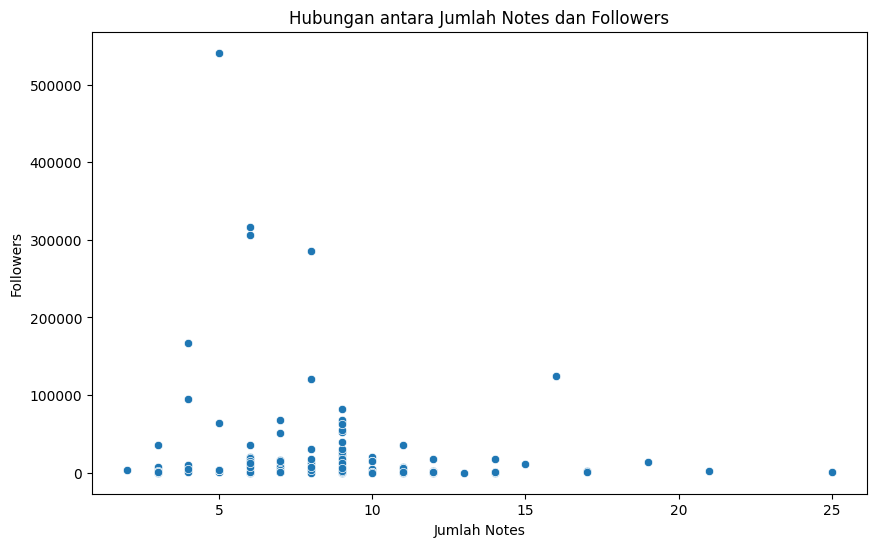

In [8]:
data['total_notes'] = data[['top_notes1', 'top_notes2', 'top_notes3', 'top_notes4', 'top_notes5', 'top_notes6', 'top_notes7', 'top_notes8', 'top_notes9', 'mid_notes1', 'mid_notes2', 'mid_notes3', 'mid_notes4', 'mid_notes5', 'mid_notes6', 'mid_notes7', 'mid_notes8', 'mid_notes9', 'base_notes1', 'base_notes2', 'base_notes3', 'base_notes4', 'base_notes5', 'base_notes6', 'base_notes7', 'base_notes8', 'base_notes9', 'base_notes10']].notnull().sum(axis=1)

correlation = data['followers'].corr(data['total_notes'])
print(f"Korelasi antara jumlah followers dan jumlah notes: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_notes', y='followers', data=data)
plt.title("Hubungan antara Jumlah Notes dan Followers")
plt.xlabel("Jumlah Notes")
plt.ylabel("Followers")
plt.show()


In [16]:
# Menghitung jumlah notes per brand
data['total_notes'] = (
    data[['top_notes1', 'top_notes2', 'top_notes3', 'top_notes4', 
          'top_notes5', 'top_notes6', 'top_notes7', 'top_notes8', 
          'top_notes9', 'mid_notes1', 'mid_notes2', 'mid_notes3', 
          'mid_notes4', 'mid_notes5', 'mid_notes6', 'mid_notes7', 
          'mid_notes8', 'mid_notes9', 'base_notes1', 'base_notes2', 
          'base_notes3', 'base_notes4', 'base_notes5', 'base_notes6', 
          'base_notes7', 'base_notes8', 'base_notes9', 'base_notes10']]
    .notnull()
    .sum(axis=1)
)

# Menghitung koefisien korelasi antara jumlah notes dan harga
correlation_notes_price = data['total_notes'].corr(data['price'])
print("Koefisien Korelasi antara Jumlah Notes dan Harga:", correlation_notes_price)

# Visualisasi hubungan antara jumlah notes dan harga
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_notes', y='price')
plt.title('Hubungan antara Jumlah Notes dan Harga')
plt.xlabel('Jumlah Notes')
plt.ylabel('Harga')
plt.grid(True)
plt.show()


ValueError: could not convert string to float: '100,500.00'